# Dog vs Cat Classification (CNN)

การจำแนกรูปภาพ ( Image Classification ) แบบ Basic เพื่อแยกว่าภาพใดเป็น Dog ภาพใดเป็น Cat ซึ่งเป็นพื้นฐานของการทำ Machine Learning และ Deep Learning โดยเราจะใช้ Convolutional Neural Network ( CNN ) ด้วย Keras รันบน Tensorflow

In [ ]:
! pip install kaggle

In [ ]:
% cd /root
! mkdir -p ~/.kaggle

/root


In [ ]:
% cd .kaggle

/root/.kaggle


## Kaggle

ทำการดาวน์โหลดไฟล์ Dataset ที่จะใช้ในการ Train & Test จาก Kaggle

In [ ]:
! touch kaggle.json

In [ ]:
f = open("kaggle.json","w+")
f.write('{"username":"xxx","key":"xxx"}')
f.close() 

In [ ]:
! kaggle --help

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [ ]:
% cd /content

/content


In [ ]:
! kaggle competitions download -c dogs-vs-cats

 98% 530M/543M [00:04<00:00, 110MB/s]
100% 543M/543M [00:04<00:00, 118MB/s]
 98% 265M/271M [00:03<00:00, 54.6MB/s]
100% 271M/271M [00:03<00:00, 73.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 85.9MB/s]


In [ ]:
! unzip /content/train.zip
! unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

## Package

*   OpenCV : ใช้ในการจัดการข้อมูลรูปภาพ
*   NumPy : ใช้ในการจัดการข้อมูลอาร์เรย์ของรูปภาพ
*   Pandas : ใช้สำหรับจัดการข้อมูลตารางเชิงโครงสร้าง
*   Matplotlib : ใช้สำหรับสร้างกราฟ
*   OS : ใช้สำหรับจัดการไฟล์ของระบบปฎิบัติการ
*   Random : ใช้ในการสร้างตัวเลขสุ่ม
*   Garbage Collector : ใช้สำหรับจัดการตัวแปรที่ไม่ได้ใช้บนหน่วยความจำ
*   Seaborn : ใช้สำหรับสร้างกราฟเป็นส่วนขยายจาก Matplotlib
*   Scikit Learn : ใช้สำหรับการทำ Machine Learning
*   Keras : ใช้สำหรับการสร้าง Model






## Step 1

1.   ทำการกำหนด Path ที่จะใช้ในการ Train & Test ใส่ในตัวแปร ***train_dir*** และ ***test_dir***
2.   ทำการแยกรูปภาพ Dog และ Cat ในโฟลเดอร์ Train ด้วยชื่อของรูปภาพ โดยใช้  format( i ) ตัดเฉพาะชื่อ ด้วยการ Loop ในโฟลเดอร์ Train ด้วย os.listdir( ) จากเงื่อนไขที่กำหนด ใส่ในตัวแปร ***train_dogs*** และ ***train_cats***
3.   ส่วนในโฟลเดอร์ Test ไม่ต้องทำการแยกรูปภาพ นำมาใส่ตัวแปร ***test_imgs***
4.   ทำการกำหนด Number of Image ที่จะนำมา Train โดยใช้ NumPy เพื่อจัดการข้อมูลอาร์เรย์ด้วยเทคนิค Slicing จำนวน 2,000 รูปของแต่ละ Class จากรูปทั้งหมด 25,000 รูป นำมาต่อกันใส่ในตัวแปร ***test_imgs***
5.   ทำการสุมรูปภาพ Random ด้วยการ Shuffle
6.   ทำการลบตัวแปรที่ไม่ได้ใช้แล้วออกไป ซึ่งก็คือข้อมูล ***train_dogs*** และ ***train_cats***




In [ ]:
import cv2 # image & video processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O - e.g. pd.read_csv

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc # garbage collector for cleaning deleted data from memory
print(os.listdir("/content/"))

train_dir = '/content/train'
test_dir = '/content/test1'

train_dogs = ['/content/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] # get dog images
train_cats = ['/content/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i] # get cat images

test_imgs = ['/content/test1/{}'.format(i) for i in os.listdir(test_dir)] # get test images

train_imgs = train_dogs[:2000] + train_cats[:2000] # slice the dataset and use 2000 in each class
random.shuffle(train_imgs) # shuffle it randomly

# Clear list that are useless
del train_dogs
del train_cats
gc.collect() # garbage collector to save memory

['.config', 'test1', 'train.zip', 'sampleSubmission.csv', 'train', 'test1.zip', 'sample_data']


8

## Step 2

1.   ทำการแสดงรูปภาพ 3 รุปแรก ในตัวแปร ***train_imgs*** โดยใช้ Matplotlib ซึ่งจะเห็นว่ามันมี Dimension ของรูปภาพที่ต่างกัน

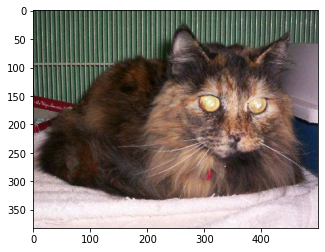

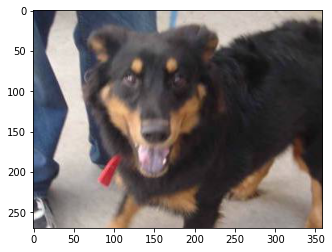

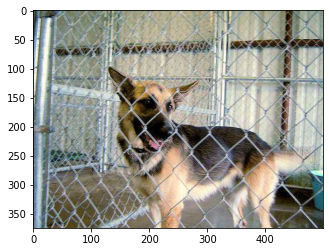

In [ ]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    implot = plt.imshow(img)
    plt.show()

2.   ทำการกำหนด Dimesion ของรูปภาพใหม่เป็น 150 * 150 พร้อมกำหนด Channel เป็น RGB

In [ ]:
# Lets declare our image dimension
# We are using coloured images
nrows = 150
ncolumns = 150
channels = 3 # change to 1 if want to use grayscale image

3.   ทำการสร้างฟังก์ชั่น Resize Image โดยใช้ OpenCV ในการปรับขนาดรูปภาพใส่ในตัวแปร ***X*** พร้อมทั้งกำหนด Label ถ้าเป็น Dog = 1 และ Cat = 0 ใสในตัวแปร ***y***

In [ ]:
def read_and_process_image(list_of_images):
    """
    Return two arrays:
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation = cv2.INTER_CUBIC)) # read the images
        # get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y

4.   ทำการเรียกฟังก์ชั่น Resize Image

In [ ]:
X, y = read_and_process_image(train_imgs)

5.   ทำการแสดง Pixel ของรูปภาพ ในตัวแปร ***X***

In [ ]:
X[0]

array([[[ 65,  86,  55],
        [ 19,  33,  21],
        [ 83, 101,  79],
        ...,
        [ 76,  84,  73],
        [ 38,  45,  35],
        [ 66,  76,  60]],

       [[ 63,  84,  53],
        [ 18,  32,  20],
        [ 83, 101,  79],
        ...,
        [ 66,  74,  63],
        [ 63,  71,  61],
        [ 61,  69,  58]],

       [[ 67,  88,  57],
        [ 14,  28,  16],
        [ 86, 103,  82],
        ...,
        [ 72,  80,  69],
        [ 59,  67,  57],
        [ 54,  62,  52]],

       ...,

       [[240, 231, 244],
        [229, 227, 239],
        [224, 226, 237],
        ...,
        [232, 224, 241],
        [228, 221, 237],
        [224, 212, 230]],

       [[233, 226, 240],
        [220, 219, 234],
        [217, 220, 234],
        ...,
        [229, 221, 238],
        [231, 223, 240],
        [235, 223, 241]],

       [[226, 222, 241],
        [214, 214, 234],
        [191, 196, 215],
        ...,
        [225, 217, 234],
        [227, 219, 236],
        [235, 223, 241]]

6.   ทำการแสดง Label ของรูปภาพ ในตัวแปร ***y***

In [ ]:
y

[0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


7.   ทำการแสดงรูปภาพ 5 รูปแรก ในตัวแปร ***X*** โดยใช้ Matplotlib ซึ่งจะเห็นว่า Dimension ของรูปภาพมีขนาดเท่ากันแล้ว

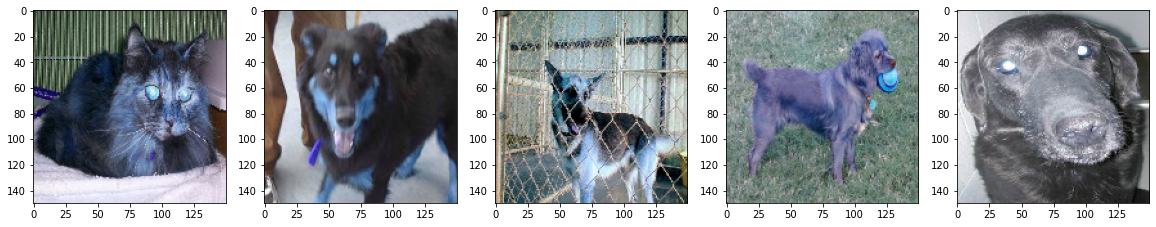

In [ ]:
plt.figure(figsize = (20, 10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

8.   ทำการแสดง Statistic Graphc โดยใช้ Seaborn พร้อมทำการลบตัวแปรที่ไม่ได้ใช้แล้วออกไป ซึ่งก็คือข้อมูล ***train_imgs*** 

Text(0.5, 1.0, 'Labels for Cats and Dogs')

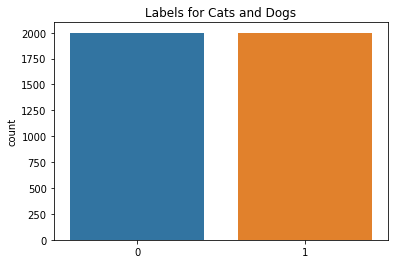

In [ ]:
import seaborn as sns
del train_imgs
gc.collect()
# Convert list to numpy array
X = np.array(X)
y = np.array(y)

# Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

9.   ทำการแสดง Dimension ของรูปภาพ ซึ่งจะประกอบไปด้วย Batch Size, Height, Width และ Channel

In [ ]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


## Step 3

Shape ของรูปภาพมีความสำคัญต่อ Keras Model ที่เราจะสร้าง ซึ่ง Model จะรับ Input ได้แก่ Height, Width และ Channel โดยข้อมูลที่จะใช้ก็พร้อมแล้ว คือ X, y

1.   ทำการ Split Data โดยใช้ Scikit Learn แบ่งข้อมูลออกเป็น Training Set ที่ใช้สำหรับการเทรน 80% และ Validation Set ที่ใช้สำหรับการตรวจสอบ 20% ทั้งตัวแปร ***X*** และ ***y***

In [ ]:
# Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 2)

print("Shape of train images is:", X_train.shape)
print("Shape of validate images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (3200, 150, 150, 3)
Shape of validate images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


2.   ทำการกำหนด Length ของ Batch Size พร้อมทำการลบตัวแปรที่ไม่ได้ใช้แล้วออกไป ซึ่งก็คือข้อมูล ***X*** และ ***y***

In [ ]:
# Clear memory
del X
del y
gc.collect()

# Get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

# We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

3.   ทำการสร้าง Model โดยใช้ Keras โดยจะประกอบไปด้วย

*   Layers : เป็นชั้นของ Layer ที่ใช้สำหรับการทำ Deep Learning เช่น Convolutional Layer, Pooling Layer, Recurrent Layer, Embedding Layer, Normalization Layer
*   Models : ประกอบไปด้วย Sequential Model และ Functional API
*   Optimizer : เป้นอัลกอริธึมของ Back Propagation สำหรับการ Train Model เช่น SGD, RMSPROP
*   ImageDataGenerator : เป็นการสร้าง Network Architecture ที่ใช้สำหรับ Dataset ที่มีขนาดเล็ก ซึ่งที่ได้รับความนิยมคือ [VGGnet](https://arxiv.org/pdf/1409.1556) จะเห็นว่า Filter Size จะมีขนาดเพิ่มขึ้นเมื่อ Layer ต่ำลงเรื่อย ๆ จาก 32 -> 64 -> 128 -> 256 -> 512 จนถึง Layer สุดท้ายเป็น 1



![alt text](https://cdn-images-1.medium.com/max/1600/1*i5y6LXNfWAXEFZlY5YjgJA.jpeg)

## Conv2D

*   Filter Size : เป็นขนาดของ Output Dimension
*   Kernel Size : เป็นขนาดของ Kernel 3 x 3
*   Input Shape : เป็นขนาดของรูปภาพที่ทำการ Resize 150 x 150 x 3
*   MaxPool2D : เป็นฟังก์ชั่นที่ช่วยลด Spatial Size ของ Feature และช่วยลดจำนวน Parameter ทำให้ลดปัญหา Overfitting กรณีที่ Model ทำงานได้ดีเยี่ยมในตอน Train แต่ทำงานได้แย่ในตอน Test
*   Flattern : 



In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # dropout for regularization
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid')) # sigmoid function at the end because we have just two classes

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


4.   ทำการแสดง Number ของ Parameter ทั้งหมดจำนวน 3 ล้านกว่า

In [ ]:
# Lets see our model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# We'll use the RMSprop optimizer with a learning rate of 0.0001
# We'll use binary_crossentropy loss because its a binary classification
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Lets create the augmentation configuration
# This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale = 1./255, # scale the image between 0 and 1
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255) # we do not augment validation data. we only perform rescale

In [ ]:
# Create the image generator
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
# The trainig part
# We train for 64 epochs with about 100 step per epoch
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain // batch_size,
                             epochs = 64,
                             validation_data = val_generator,
                             validation_steps = nval // batch_size)




Epoch 1/64





100/100 [==============================] - 29s 290ms/step - loss: 0.6928 - acc: 0.5184 - val_loss: 0.7247 - val_acc: 0.4950
Epoch 2/64
100/100 [==============================] - 18s 176ms/step - loss: 0.6884 - acc: 0.5394 - val_loss: 0.6793 - val_acc: 0.5613
Epoch 3/64
100/100 [==============================] - 18s 175ms/step - loss: 0.6682 - acc: 0.5919 - val_loss: 0.6648 - val_acc: 0.5913
Epoch 4/64
100/100 [==============================] - 17s 173ms/step - loss: 0.6604 - acc: 0.6028 - val_loss: 0.7099 - val_acc: 0.5225
Epoch 5/64
100/100 [==============================] - 17s 171ms/step - loss: 0.6483 - acc: 0.6181 - val_loss: 0.6363 - val_acc: 0.6312
Epoch 6/64
100/100 [==============================] - 17s 174ms/step - loss: 0.6417 - acc: 0.6250 - val_loss: 0.6372 - val_acc: 0.6362
Epoch 7/64
100/100 [==============================] - 17s 174ms/step - loss: 0.6306 - acc: 0.6347 - val_loss: 0.6067 - val_acc: 0.6575
Epoch 8/64
100/100 [===========================

In [ ]:
# Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

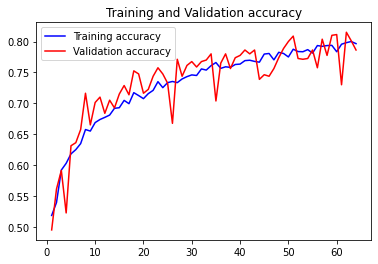

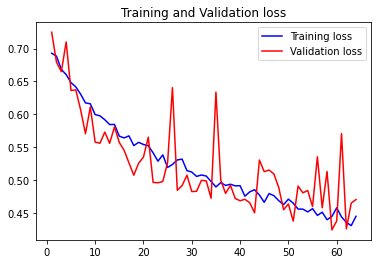

In [ ]:
# Lets plot the train and val curve
# Get the details from the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
# Train and Validation loss
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) # Y_test in this case will be empty
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

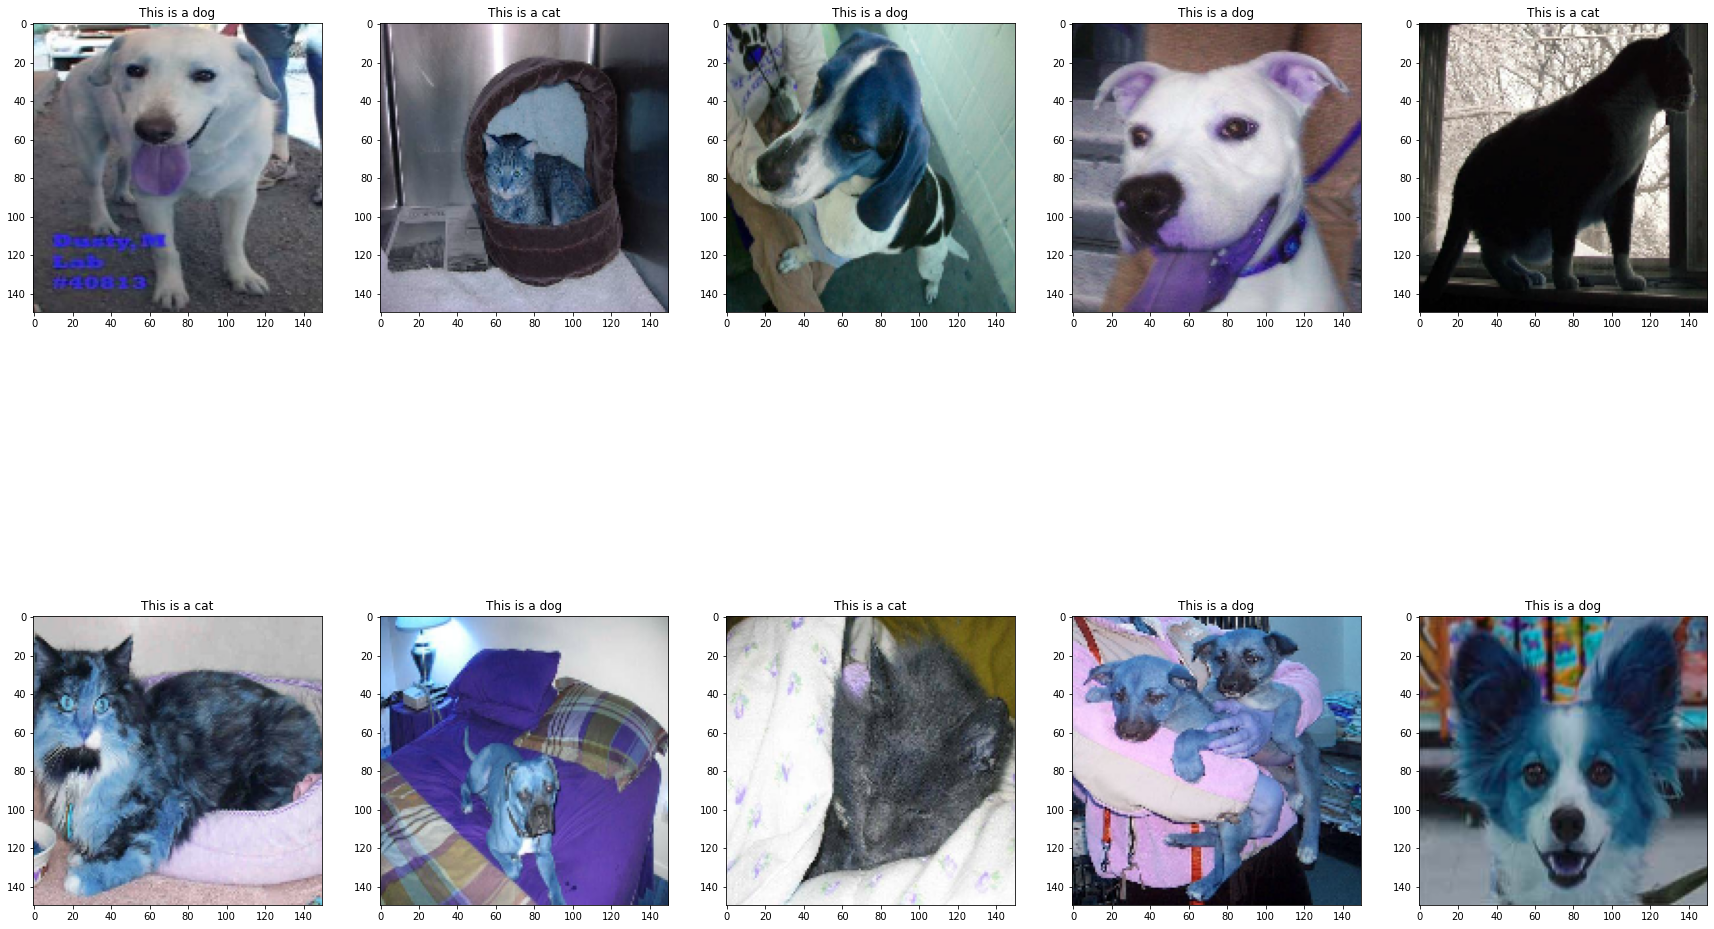

In [ ]:
i = 0
text_labels = []
plt.figure(figsize = (30, 20))
for batch in test_datagen.flow(x, batch_size = 1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    implot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()

https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9

https://github.com/Kaggle/kaggle-api

https://www.kaggle.com/mallela432/cats-vs-dogs-cnn-implementation-with-keras